In [1]:
import sys
print(sys.executable)


c:\Users\owner\AppData\Local\Python\pythoncore-3.14-64\python.exe


In [2]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn


#Import libraries which are required 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
print(pd.__version__)


2.3.3


#upload data set and display first 5 rows to understand data structure on which perform cleaning and EDA 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Uber Request Data.csv")
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


#check the shape of data set

In [6]:
df.shape


(6745, 6)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [8]:
df.describe(include='all')


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 8:37,12/7/2016 6:22
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


# find null values and sum of all

In [9]:
df.isnull().sum()


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [10]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='coerce')


ValueError: time data "13-07-2016 08:33:16" doesn't match format "%m/%d/%Y %H:%M", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df['Request timestamp'] = pd.to_datetime(
    df['Request timestamp'],
    dayfirst=True,
    errors='coerce'
)

df['Drop timestamp'] = pd.to_datetime(
    df['Drop timestamp'],
    dayfirst=True,
    errors='coerce'
)


In [11]:
df[df['Drop timestamp'].isnull()]['Status'].value_counts()


Status
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [12]:
df['Status'] = df['Status'].str.strip()
df['Pickup point'] = df['Pickup point'].str.strip()


In [13]:
df.duplicated().sum()


np.int64(0)

In [15]:
df.describe(include='all')


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 8:37,12/7/2016 6:22
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [16]:
df.isnull().sum()


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [17]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='coerce')


In [18]:
df[df['Drop timestamp'].isnull()]['Status'].value_counts()


Status
No Cars Available    2650
Trip Completed       1681
Cancelled            1264
Name: count, dtype: int64

In [19]:
df['Status'] = df['Status'].str.strip()
df['Pickup point'] = df['Pickup point'].str.strip()


In [20]:
df.duplicated().sum()


np.int64(0)

In [21]:
df[df.duplicated(keep=False)].head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


In [22]:
df.describe(include='all')


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,2674,1150
unique,NaN,2,NaN,3,NaN,NaN
top,NaN,City,NaN,Trip Completed,NaN,NaN
freq,NaN,3507,NaN,2831,NaN,NaN
mean,3384.644922,NaN,149.501343,NaN,2016-11-22 05:26:05.789080064,2016-11-22 09:16:02.295652352
min,1.000000,NaN,1.000000,NaN,2016-11-07 00:00:00,2016-11-07 00:51:00
25%,1691.000000,NaN,75.000000,NaN,2016-11-07 12:58:00,2016-11-07 13:29:15
50%,3387.000000,NaN,149.000000,NaN,2016-11-07 23:13:30,2016-11-07 23:45:30
75%,5080.000000,NaN,224.000000,NaN,2016-12-07 13:24:45,2016-12-07 12:26:00
max,6766.000000,NaN,300.000000,NaN,2016-12-07 23:54:00,2016-12-07 23:45:00


In [23]:
df.isnull().sum()


Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp    4071
Drop timestamp       5595
dtype: int64

FEATURE ENGINEERING
# Extract Hour from Request Timestamp because demand and supply vary hour by hour.


In [24]:
df['request_hour'] = df['Request timestamp'].dt.hour


In [25]:
df[['Request timestamp', 'request_hour']].head()


,Request timestamp,request_hour
0,2016-11-07 11:51:00,11.0
1,2016-11-07 17:57:00,17.0
2,2016-12-07 09:17:00,9.0
3,2016-12-07 21:08:00,21.0
4,NaT,NaN


# Request hour was extracted to analyze hourly demand fluctuations and identify peak usage periods.

# Weekdays and weekends show different demand patterns so extract by Day aswell.

In [26]:
df['request_day'] = df['Request timestamp'].dt.day_name()


In [27]:
df['request_day'].value_counts()


request_day
Monday       1367
Wednesday    1307
Name: count, dtype: int64

# Day level features were created to study weekly demand trends and support weekday wise driver allocation strategies.

In [28]:
df['request_date'] = df['Request timestamp'].dt.date


In [29]:
# It Helps identify daily demand spikes.


In [ ]:
# Requests group into business friendly time slots to simplify demand supply comparison and identify peak pressure periods.

In [31]:
def time_slot(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_slot'] = df['request_hour'].apply(time_slot)


In [32]:
df['time_slot'].value_counts()


time_slot
Night        4634
Morning      1014
Evening       761
Afternoon     336
Name: count, dtype: int64

# Binary indicators creat to represent demand and fulfilled supply, enabling quantification of unmet demand.

In [33]:
df['demand'] = 1
df['supply'] = df['Status'].apply(lambda x: 1 if x == 'Trip Completed' else 0)


In [34]:
df[['Status', 'demand', 'supply']].head()


,Status,demand,supply
0,Trip Completed,1,1
1,Trip Completed,1,1
2,Trip Completed,1,1
3,Trip Completed,1,1
4,Trip Completed,1,1


# Pickup point directly affects cancellations and availability.

In [35]:
df['is_airport'] = df['Pickup point'].apply(lambda x: 1 if x == 'Airport' else 0)


In [36]:
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_hour,request_day,request_date,time_slot,demand,supply,is_airport
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11.0,Monday,2016-11-07,Morning,1,1,1
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17.0,Monday,2016-11-07,Evening,1,1,1
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9.0,Wednesday,2016-12-07,Morning,1,1,0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21.0,Wednesday,2016-12-07,Night,1,1,1
4,3112,City,1.0,Trip Completed,NaT,NaT,NaN,NaN,NaT,Night,1,1,0


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  2674 non-null   datetime64[ns]
 5   Drop timestamp     1150 non-null   datetime64[ns]
 6   request_hour       2674 non-null   float64       
 7   request_day        2674 non-null   object        
 8   request_date       2674 non-null   object        
 9   time_slot          6745 non-null   object        
 10  demand             6745 non-null   int64         
 11  supply             6745 non-null   int64         
 12  is_airport         6745 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(5)
memory us

# UNIVARIATE ANALYSIS
# Univariate analysis is performed to understand the distribution and behavior of individual variables before examining relationships between them

In [38]:
df['Status'].value_counts()


Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [39]:
df['Status'].value_counts(normalize=True) * 100


Status
Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: proportion, dtype: float64

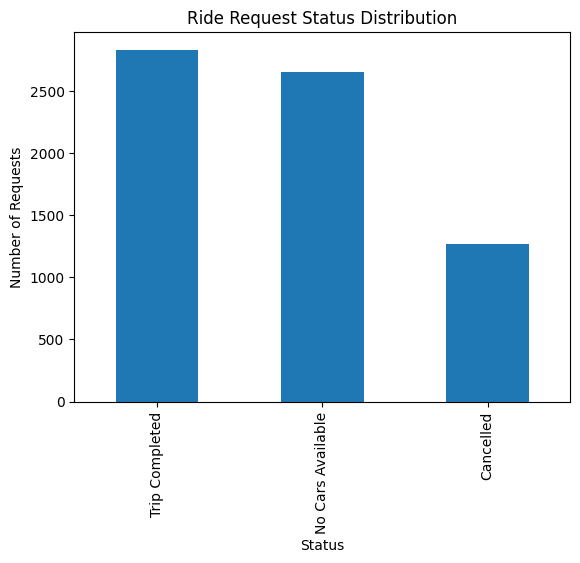

In [40]:
import matplotlib.pyplot as plt

df['Status'].value_counts().plot(kind='bar')
plt.title('Ride Request Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Requests')
plt.show()


# Pickup location directly impacts Driver availability, Cancellation rate.


In [41]:
df['Pickup point'].value_counts()


Pickup point
City       3507
Airport    3238
Name: count, dtype: int64

In [42]:
df['Pickup point'].value_counts(normalize=True) * 100


Pickup point
City       51.99407
Airport    48.00593
Name: proportion, dtype: float64

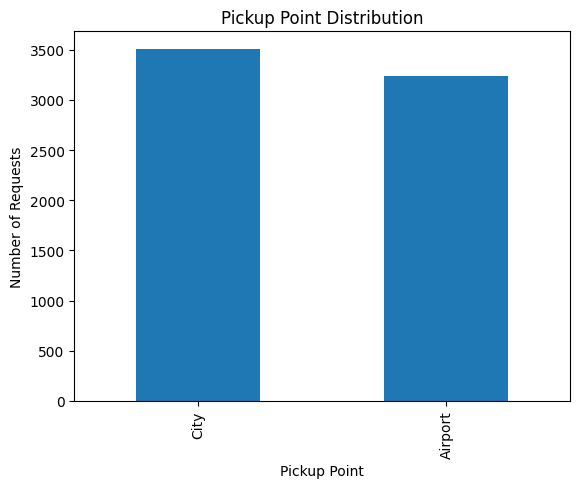

In [43]:
df['Pickup point'].value_counts().plot(kind='bar')
plt.title('Pickup Point Distribution')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.show()


# Request Hour Distribution helps identify peak demand hours.

In [44]:
df['request_hour'].value_counts().sort_index()


request_hour
0.0      32
1.0      28
2.0      30
3.0      31
4.0      82
5.0     171
6.0     171
7.0     150
8.0     159
9.0     190
10.0     92
11.0     81
12.0     81
13.0     59
14.0     58
15.0     67
16.0     71
17.0    168
18.0    205
19.0    193
20.0    195
21.0    186
22.0    107
23.0     67
Name: count, dtype: int64

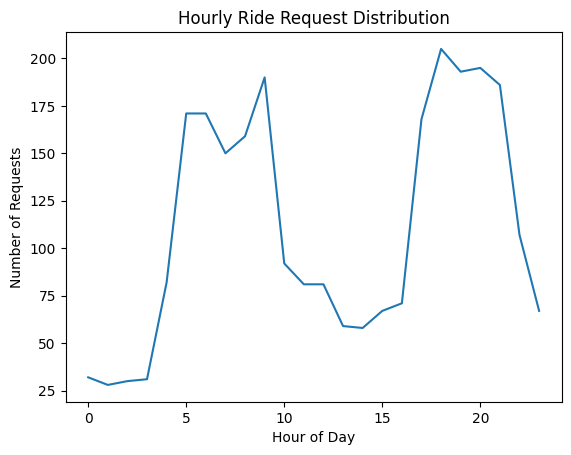

In [45]:
df['request_hour'].value_counts().sort_index().plot(kind='line')
plt.title('Hourly Ride Request Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.show()


# Time slot Distribution

In [46]:
df['time_slot'].value_counts()


time_slot
Night        4634
Morning      1014
Evening       761
Afternoon     336
Name: count, dtype: int64

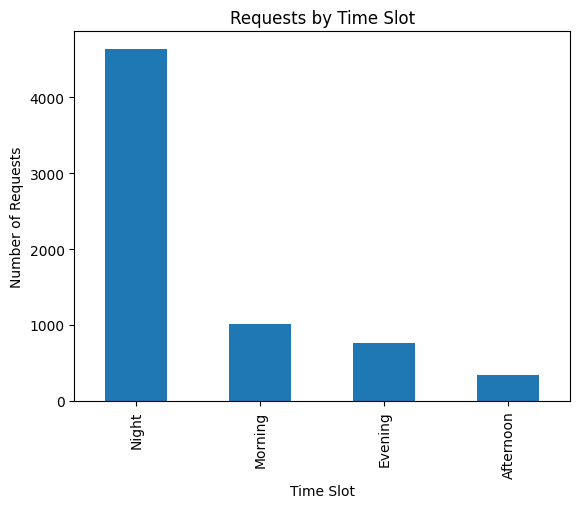

In [47]:
df['time_slot'].value_counts().plot(kind='bar')
plt.title('Requests by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.show()


# Day wise Distribution Demand varies by weekday.

In [48]:
df['request_day'].value_counts()


request_day
Monday       1367
Wednesday    1307
Name: count, dtype: int64

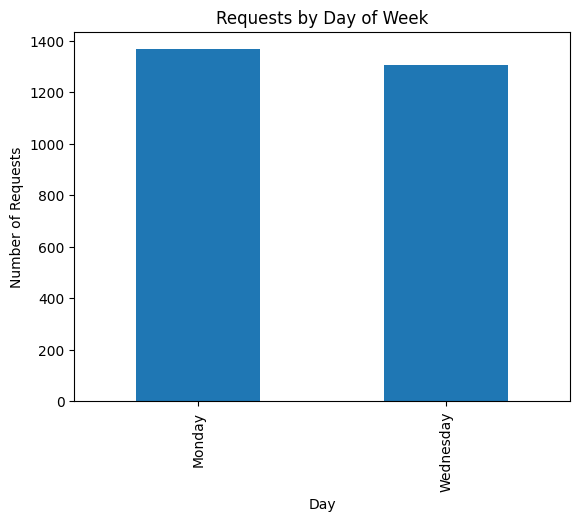

In [49]:
df['request_day'].value_counts().plot(kind='bar')
plt.title('Requests by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Requests')
plt.show()


# BIVARIATE ANALYSIS
It is performed to understand relationships between key variables and identify factors contributing to ride failures and supply demand gaps.

In [50]:
pd.crosstab(df['Pickup point'], df['Status'])


Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


In [51]:
pd.crosstab(df['Pickup point'], df['Status'], normalize='index') * 100


Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,6.114886,52.903027,40.982088
City,30.396350,26.717993,42.885657


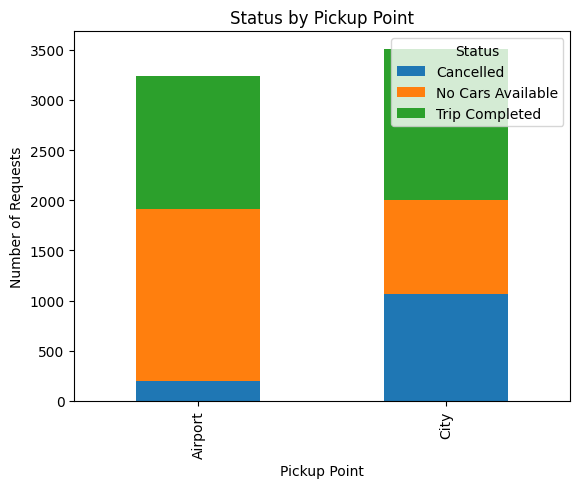

In [52]:
pd.crosstab(df['Pickup point'], df['Status']).plot(kind='bar', stacked=True)
plt.title('Status by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.show()


Status vs Time Slot because supply problems are time-dependent

In [53]:
pd.crosstab(df['time_slot'], df['Status'])


Status,Cancelled,No Cars Available,Trip Completed
time_slot,,,
Afternoon,42,76,218
Evening,52,454,255
Morning,361,192,461
Night,809,1928,1897


In [54]:
pd.crosstab(df['time_slot'], df['Status'], normalize='index') * 100


Status,Cancelled,No Cars Available,Trip Completed
time_slot,,,
Afternoon,12.500000,22.619048,64.880952
Evening,6.833114,59.658344,33.508541
Morning,35.601578,18.934911,45.463511
Night,17.457920,41.605524,40.936556


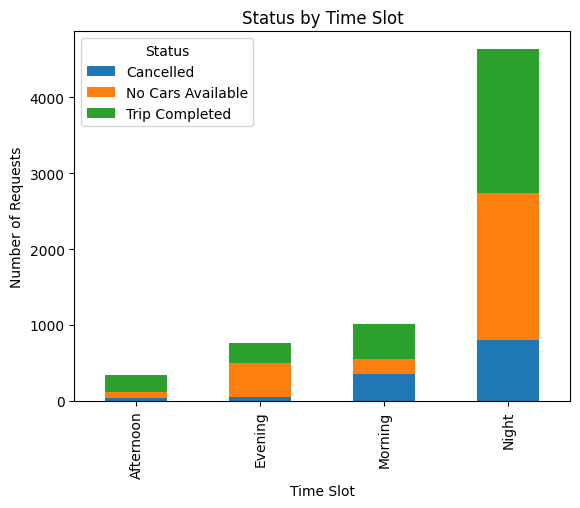

In [55]:
pd.crosstab(df['time_slot'], df['Status']).plot(kind='bar', stacked=True)
plt.title('Status by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.show()


# Demand vs Supply by Time Slot

In [56]:
gap_by_time = df.groupby('time_slot').agg(
    total_requests=('demand', 'sum'),
    completed_trips=('supply', 'sum')
)

gap_by_time['gap'] = gap_by_time['total_requests'] - gap_by_time['completed_trips']
gap_by_time


,total_requests,completed_trips,gap
time_slot,,,
Afternoon,336,218,118
Evening,761,255,506
Morning,1014,461,553
Night,4634,1897,2737


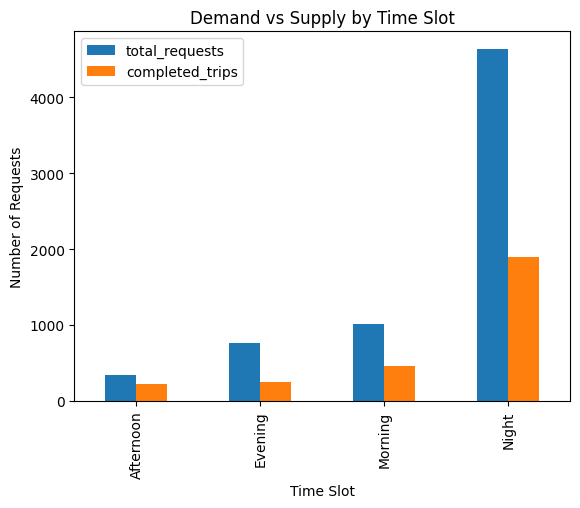

In [57]:
gap_by_time[['total_requests', 'completed_trips']].plot(kind='bar')
plt.title('Demand vs Supply by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.show()


# Status vs Day of Week

In [58]:
pd.crosstab(df['request_day'], df['Status'])


Status,Cancelled,No Cars Available,Trip Completed
request_day,,,
Monday,262,504,601
Wednesday,240,505,562


In [59]:
pd.crosstab(df['request_day'], df['Status'], normalize='index') * 100


Status,Cancelled,No Cars Available,Trip Completed
request_day,,,
Monday,19.166057,36.869056,43.964887
Wednesday,18.362663,38.638103,42.999235


In [2]:
import sys
sys.executable


'c:\\Users\\owner\\AppData\\Local\\Python\\pythoncore-3.14-64\\python.exe'

In [4]:
!python -m pip install openpyxl


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]

